# Import all the crucial libraries

In [5]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    roc_auc_score, roc_curve, balanced_accuracy_score, matthews_corrcoef, log_loss
)
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sklearn'

# Import the dataset

In [2]:
df = pd.read_csv("D:\ML-Data-Sets\Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


# Identifying and handling the missing values

In [3]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df1 = df.copy()

In [5]:
print("Before:", df.shape)

Before: (10002, 14)


# handling the missing values : Dropna

In [6]:
df1.dropna(inplace=True)

In [7]:
print("After:", df1.shape)

After: (9998, 14)


In [8]:
df1.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


# Split DataSet for Encoding

In [10]:
x = df1.drop(['Surname','RowNumber'], axis=1)
y = df1['Exited']

In [11]:
x.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,15574012,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [12]:
y.head()

0    1
1    0
2    1
3    0
5    1
Name: Exited, dtype: int64

# Encoding : LabelEncoder

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Geography'] = le.fit_transform(x['Geography'])
x['Gender'] = le.fit_transform(x['Gender'])
x

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,15574012,645,2,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9997,15584532,709,0,0,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,15682355,772,1,1,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,15682355,772,1,1,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,15628319,792,0,0,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [14]:
x.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,15574012,645,2,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [15]:
y = pd.DataFrame(df1, columns=['Exited'])
y.head()

,Exited
0,1
1,0
2,1
3,0
5,1


In [16]:
print(f"Length of X: {len(x)}")
print(f"Length of y: {len(y)}")

Length of X: 9998
Length of y: 9998


# Splitting the dataset

In [17]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)


# Python library used for reading and writing Excel files

In [18]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


# Define Models

In [19]:
models = {
    "SVC": SVC(probability=True),  # Enable probability estimation for ROC AUC
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Classification Metrics Analysis of Different Classification Models

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import balanced_accuracy_score, matthews_corrcoef, log_loss
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the y_test for ROC AUC in the case of multiclass classification
y_binarized = label_binarize(y_test, classes=np.unique(y_test))

results = {}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Predict probabilities for ROC AUC (if available)
    y_prob = model.predict_proba(x_test) if hasattr(model, "predict_proba") else None
    
    # Calculate ROC AUC score if y_prob is available
    if y_prob is not None:
        if y_binarized.shape[1] > 1:  # For multiclass
            roc_auc = roc_auc_score(y_binarized, y_prob, multi_class='ovr')
        else:  # For binary, use only positive class probabilities
            roc_auc = roc_auc_score(y_test, y_prob[:, 1])
    else:
        roc_auc = None  # Set to None if AUC can't be computed
    
    # Calculate other metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    log_loss_value = log_loss(y_test, y_prob) if y_prob is not None else None

    # Confusion matrix for specificity calculation
    conf_matrix = confusion_matrix(y_test, y_pred)
    if conf_matrix.shape == (2, 2):  # For binary classification
        tn, fp, fn, tp = conf_matrix.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else None
    else:
        specificity = None  # Specificity isn't defined for multiclass

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Specificity": specificity,
        "Confusion Matrix": conf_matrix,
        "AUC": roc_auc,
        "Balanced Accuracy": balanced_accuracy,
        "MCC": mcc,
        "Logarithmic Loss": log_loss_value
    }

# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print("\n")


E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
E:\anaconda\Lib\site

Model: SVC
Accuracy: 0.7955
Precision: 0.39775
Recall: 0.5
F1 Score: 0.443052074631022
Specificity: 1.0
Confusion Matrix: [[1591    0]
 [ 409    0]]
AUC: 0.5685710729208768
Balanced Accuracy: 0.5
MCC: 0.0
Logarithmic Loss: 0.502666084973328


Model: Naive Bayes
Accuracy: 0.7965
Precision: 0.6607050619834711
Recall: 0.5305999978485337
F1 Score: 0.5120696817243721
Specificity: 0.9805153991200503
Confusion Matrix: [[1560   31]
 [ 376   33]]
AUC: 0.7936544038210042
Balanced Accuracy: 0.5305999978485337
MCC: 0.1402508402961307
Logarithmic Loss: 0.42803999323999053


Model: Decision Tree
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Specificity: 1.0
Confusion Matrix: [[1591    0]
 [   0  409]]
AUC: 1.0
Balanced Accuracy: 1.0
MCC: 1.0
Logarithmic Loss: 2.2204460492503136e-16


Model: Logistic Regression
Accuracy: 0.7955
Precision: 0.39775
Recall: 0.5
F1 Score: 0.443052074631022
Specificity: 1.0
Confusion Matrix: [[1591    0]
 [ 409    0]]
AUC: 0.5703245179562915
Balanced Accuracy: 0.

# Export Excel File

In [21]:
import pandas as pd

# Convert the nested results dictionary to a DataFrame
results_df = pd.DataFrame(results).T  # Transpose to get models as rows

# Define the file name
file_name = 'model_evaluation_results.xlsx'

# Save the DataFrame to an Excel file
results_df.to_excel(file_name, index=True)

print(f"Model evaluation results have been saved to {file_name}")


Model evaluation results have been saved to model_evaluation_results.xlsx


# ROC curve for Specific Model

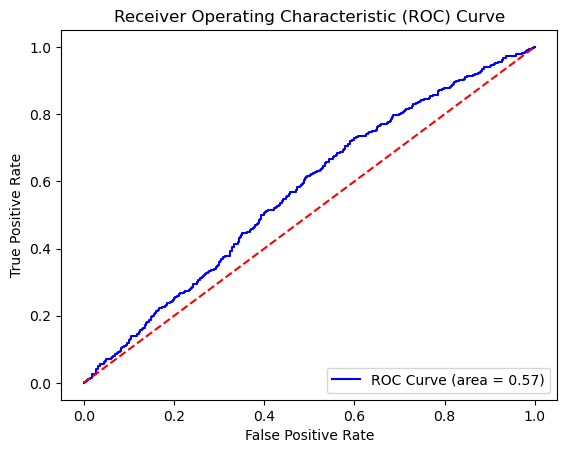

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Check if it is binary classification
if len(np.unique(y_test)) == 2:  
    # Get probabilities for the positive class
    y_prob = models["SVC"].predict_proba(x_test)[:, 1] 

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is only applicable for binary classification.")
